In [1]:
import struct
import numpy as np
import matplotlib.pyplot as plt
import pdb
from scipy.spatial import ConvexHull
import k3d
from mpl_toolkits import mplot3d
from itertools import chain
import ipympl #Required for interactive control

In [2]:
def read_binary_stl(filename):
    with open(filename, "rb") as f:
        # 80バイトのヘッダーをスキップ
        header = f.read(80)
        print("Header:", header.decode(errors="ignore"))

        # 4バイトの三角形数を取得
        num_triangles = struct.unpack("<I", f.read(4))[0]
        print("Number of triangles:", num_triangles)

        triangles = []

        for _ in range(num_triangles):
            # 1つの三角形のデータ（50バイト）
            data = f.read(50)

            # 法線ベクトル (3 x float32)
            normal = struct.unpack("<fff", data[0:12])
            # 3つの頂点座標 (3 x (3 x float32))
            v1 = struct.unpack("<fff", data[12:24])
            v2 = struct.unpack("<fff", data[24:36])
            v3 = struct.unpack("<fff", data[36:48])

            # 2バイトの属性バイト数（無視する）
            attr_byte_count = struct.unpack("<H", data[48:50])[0]

            # triangles.append((normal, v1, v2, v3))
            triangles.append((v1, v2, v3))

        return triangles


In [44]:
# Read STL
# stl_file = "box.stl"
# stl_file = "pyramid.stl"
stl_file = "octo.stl"
# stl_file = "bridge_wall.stl"
triangles = read_binary_stl(stl_file)

# Store Z data
zs = np.array([])
if triangles:
    for t in triangles:
        for tri in t:
            zs = np.append(zs, tri[2])



Header: COLOR= MATERIAL=                                                    
Number of triangles: 300


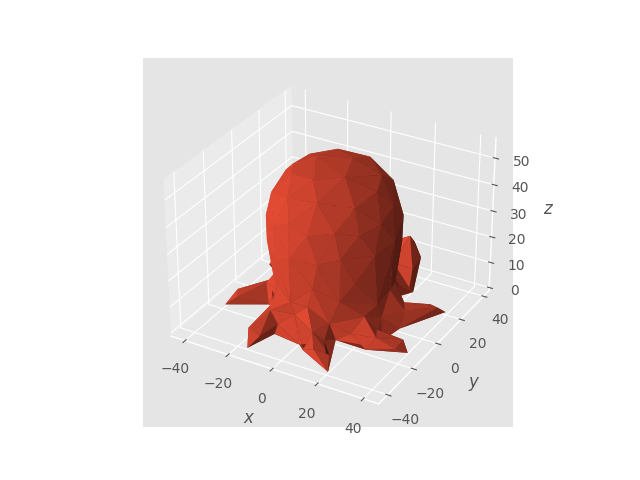

In [45]:
tri_points = list(chain.from_iterable(triangles))
x, y, z = zip(*tri_points)
tri_idx = [(3 * i, 3 * i + 1, 3 * i + 2) for i in range(len(triangles))]
ax = plt.figure().add_subplot(projection='3d')
ax.plot_trisurf(x, y, z, triangles=tri_idx)
ax.set_xlabel(r"$x$"); ax.set_ylabel(r"$y$"); ax.set_zlabel(r"$z$")
plt.show()

In [46]:
# Z points for slicing 
number_of_slicing_planes =  3 
z_points = np.linspace(zs.min(),zs.max(),number_of_slicing_planes) 
z_points

array([-0.09366351, 28.07445082, 56.24256516])

In [47]:
def append_array(array, new_array):
     if array.size == 0:
         points = np.append(array,new_array)
     else:
         points = np.vstack([array,new_array])
     return points 

In [48]:
def find_intersection(xi,yi,xj,yj,zi,zj,zp):
    k = (zp-zi)/(zj-zp)
    x = 1/(1+k)*xi + k/(1+k)*xj
    y = 1/(1+k)*yj + k/(1+k)*yj
    return (x,y) 

In [49]:
xy_dict = {}
for zp in z_points:
    # points = np.array([])
    points = []
    for t in triangles:
        triangle_points = np.array([])
        first = t[0]
        second = t[1]
        third = t[2]
        x1 = first[0]
        y1 = first[1]
        x2 = second[0]
        x3 = third[0]
        y2 = second[1]
        y3 = third[1]
        z1 = first[2]
        z2 = second[2]
        z3 = third[2]
        if zp > z1 and zp < z2:
            print('hi')
            (x,y) = find_intersection(x1, x2, y1, y2, z1, z2, zp)
            triangle_points = append_array(triangle_points, np.array([x,y]))
        elif zp > z2 and zp < z3:
            print('hi')
            (x,y) = find_intersection(x2, x3, y2, y3, z2, z3, zp)
            triangle_points = append_array(triangle_points, np.array([x,y]))
        elif zp > z3 and zp < z1:
            print('hi')
            (x,y) = find_intersection(x3, x1, y3, y1, z3, z1, zp)
            triangle_points = append_array(triangle_points, np.array([x,y]))
        elif zp > z2 and zp < z1:
            print('hi')
            (x,y) = find_intersection(x2, x1, y2, y1, z2, z1, zp)
            triangle_points = append_array(triangle_points, np.array([x,y]))
        elif zp > z3 and zp < z2:
            print('hi')
            (x,y) = find_intersection(x3, x2, y3, y2, z3, z2, zp)
            triangle_points = append_array(triangle_points, np.array([x,y]))
        elif zp > z1 and zp < z3:
            print('hi')
            (x,y) = find_intersection(x1, x3, y1, y3, z1, z3, zp)
            triangle_points = append_array(triangle_points, np.array([x,y]))
        elif zp == z1:
            print('hi')
            x = x1
            y = y1
            triangle_points = append_array(triangle_points, np.array([x,y]))
        elif zp == z2:
            print('hi')
            x = x2
            y = y2
            triangle_points = append_array(triangle_points, np.array([x,y]))
        elif zp == z3:
            print('hi')
            x = x3
            y = y3
            triangle_points = append_array(triangle_points, np.array([x,y]))
        if len(triangle_points)>0:
            print('**')
            print(triangle_points)
            points.append(triangle_points)
    xy_dict[zp] = points
    # print(zp)
    # print(points)
# xy_dict

**
[-18.785923    37.78982162]
**
[-18.785923    37.78982162]
**
[-18.785923    37.78982162]
**
[-18.785923    37.78982162]
**
[-15.99798383  24.3701458 ]
**
[-15.92051051 -22.2399292 ]
**
[ 7.44882795 24.62406921]
**
[-15.59889619  25.32857513]
**
[22.12068311 27.16864967]
**
[-5.9362554  -7.45123434]
**
[ 6.86001407 27.15135193]
**
[-16.65334747 -16.20075035]
**
[ 0.82949805 14.55663681]
**
[-19.40181946 -25.98603249]
**
[23.4831151  18.92298698]
**
[-10.6773917  -16.20075035]
**
[-11.20235407  -7.45123434]
**
[ 9.09463559 14.55663681]
**
[17.89577987 18.92298698]
**
[-15.44806807 -25.1888752 ]
**
[ -1.84036071 -21.60743332]
**
[-4.33732463  1.59657311]
**
[-19.03843462 -25.98603249]
**
[-21.13082159 -25.98603249]
**
[-15.67357927  14.55663681]
**
[18.79438272 18.92298698]
**
[12.55236537 24.62406921]
**
[-11.12404311 -21.60743332]
**
[24.0423606  10.49016666]
**
[ 8.99108909 27.16864967]
**
[ -1.26225277 -11.0166254 ]
**
[6.40297212 1.59657311]
**
[-20.37258982 -16.20075035]
**
[18.

zp: 0.0
****
[array([ 25., -25.])]
****
[array([ 21.875, -18.75 ])]
****
[array([ 21.875, -18.75 ])]
****
[array([ 18.75, -12.5 ])]
****
[array([ 18.75, -12.5 ])]
****
[array([15.625, -6.25 ])]
****
[array([15.625, -6.25 ])]
****
[array([12.5,  0. ])]
****
[array([12.5,  0. ])]
****
[array([9.375, 6.25 ])]
****
[array([9.375, 6.25 ])]
****
[array([ 6.25, 12.5 ])]
****
[array([ 6.25, 12.5 ])]
****
[array([ 3.125, 18.75 ])]
****
[array([ 3.125, 18.75 ])]
****
[array([-3.125, 18.75 ])]
****
[array([-8.8817842e-15,  2.5000000e+01])]
****
[array([-8.8817842e-15,  2.5000000e+01])]
****
[array([-6.25, 12.5 ])]
****
[array([-3.125, 18.75 ])]
****
[array([-3.125, 18.75 ])]
****
[array([-9.375,  6.25 ])]
****
[array([-6.25, 12.5 ])]
****
[array([-6.25, 12.5 ])]
****
[array([-12.5,   0. ])]
****
[array([-9.375,  6.25 ])]
****
[array([-9.375,  6.25 ])]
****
[array([-15.625,  -6.25 ])]
****
[array([-12.5,   0. ])]
****
[array([-12.5,   0. ])]
****
[array([-18.75, -12.5 ])]
****
[array([-15.625,  -6

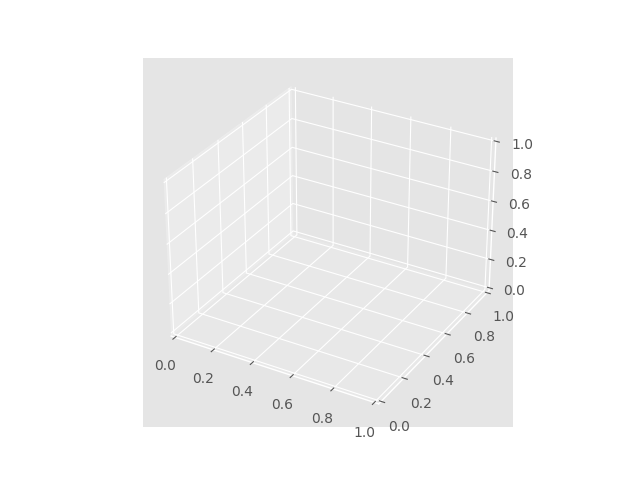

In [41]:
ax = plt.figure().add_subplot(projection='3d')
for zp in z_points:
    xy_points = xy_dict[zp]
    print('zp:',zp)
    for xy_point in xy_points:
        print('****')
        print(xy_point)
        try:
            hull = ConvexHull(xy_point)
            points = hull.points
            hull_points = points[hull.vertices]
            hp = np.vstack((hull_points, hull_points[0]))
            # plt.plot(hp[:,0], hp[:,1], zp)
            plt.plot(xy_point[:,0], xy_point[:,1], zp)
            
            # plt.scatter(points[:,0], points[:,1], zp)
        except Exception:
            pass
plt.show()

zp: 8.5


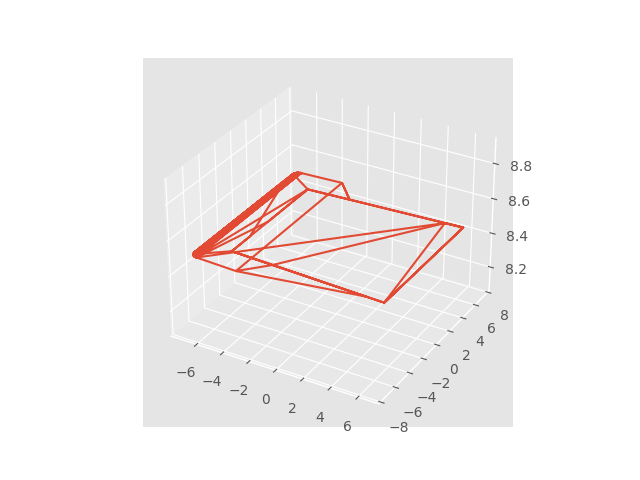

zp: 9.9731579830772


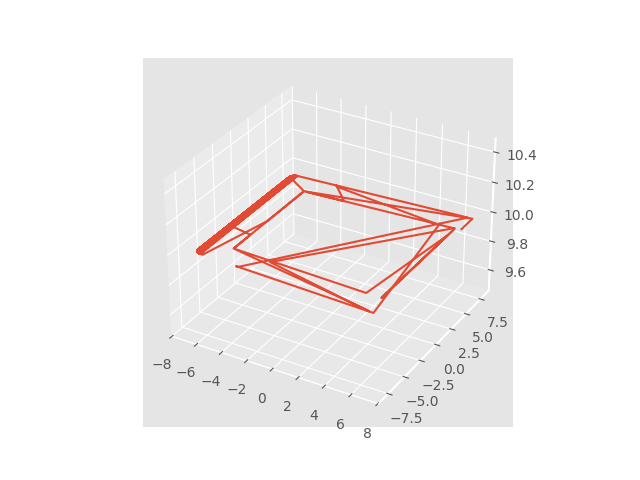

zp: 11.4463159661544


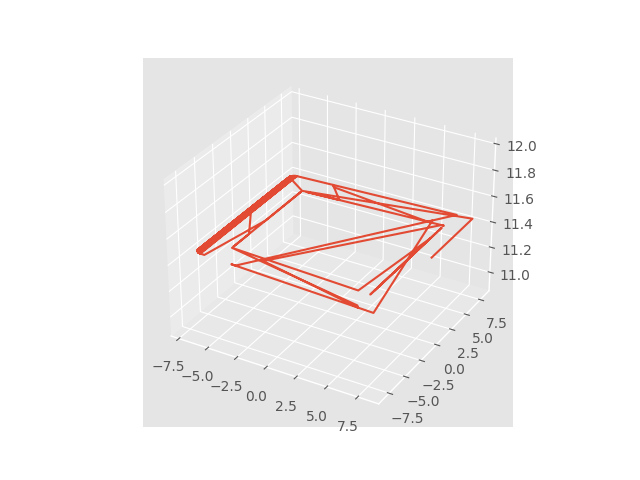

zp: 12.9194739492316


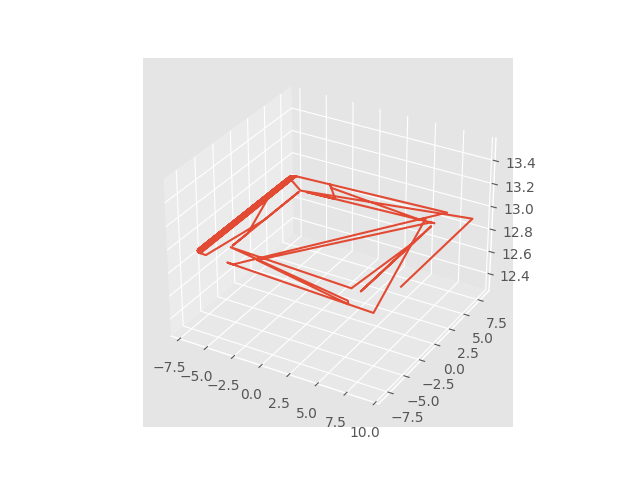

zp: 14.392631932308799


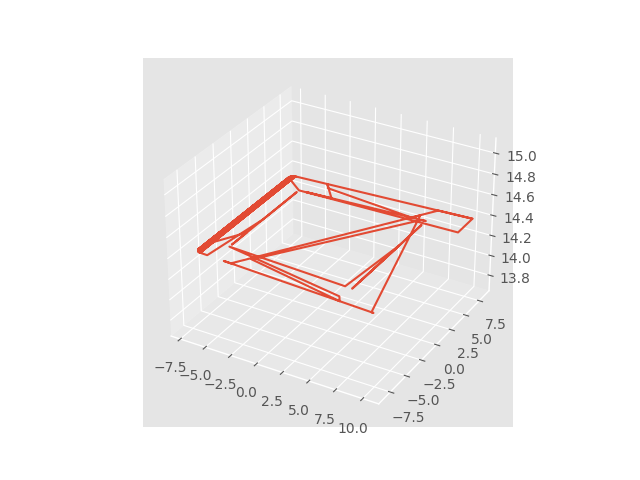

zp: 15.865789915386


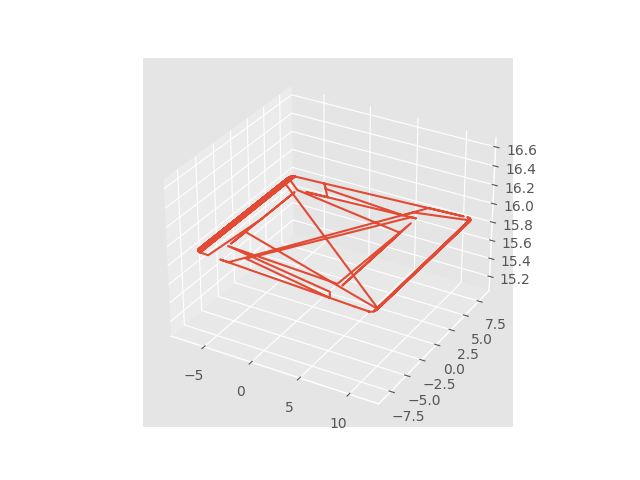

zp: 17.3389478984632


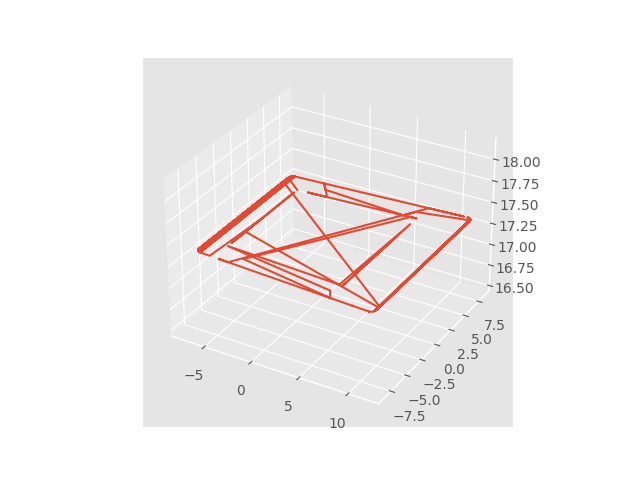

zp: 18.812105881540397


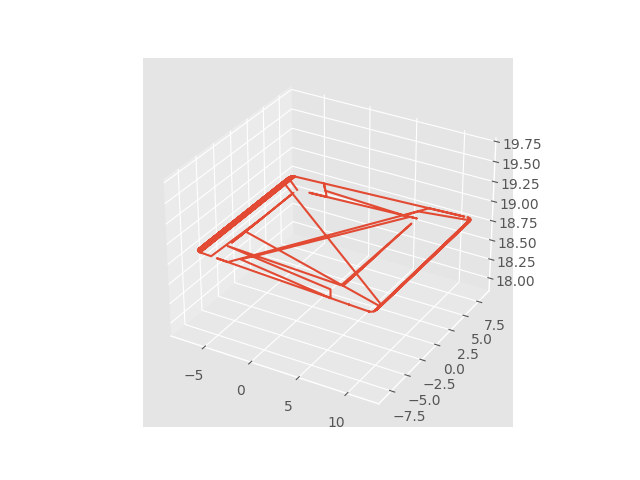

zp: 20.285263864617598


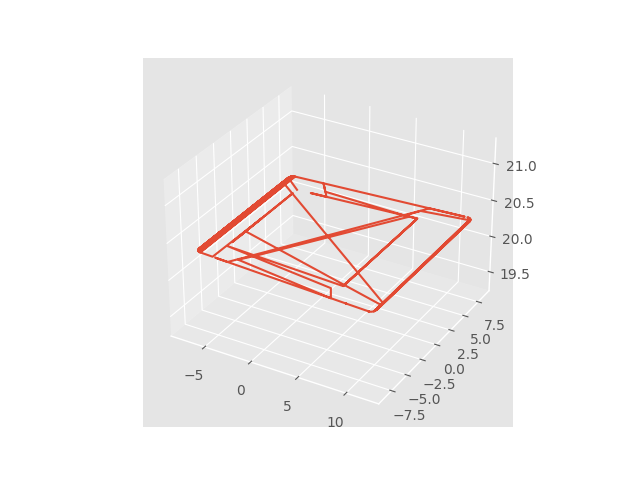

zp: 21.758421847694798


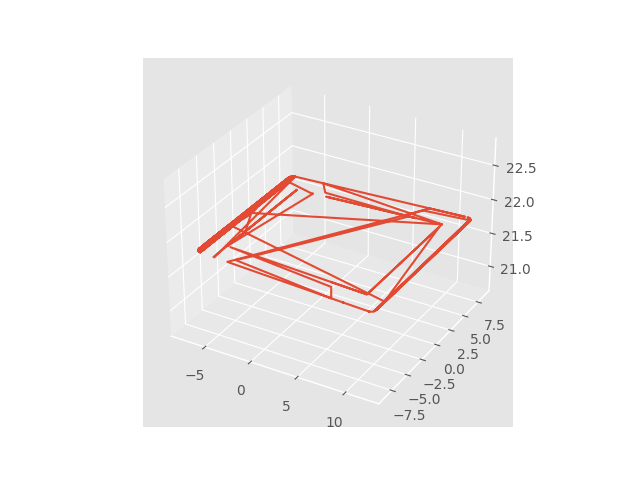

zp: 23.231579830772


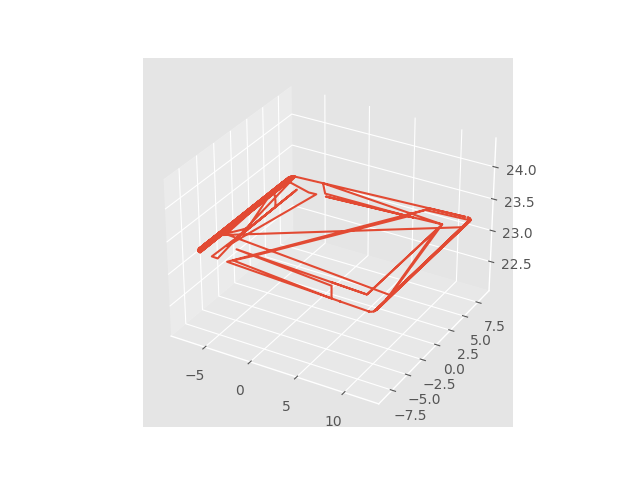

zp: 24.7047378138492


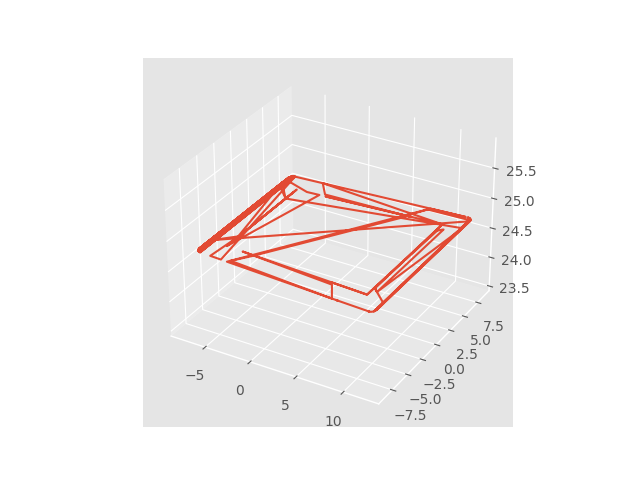

zp: 26.1778957969264


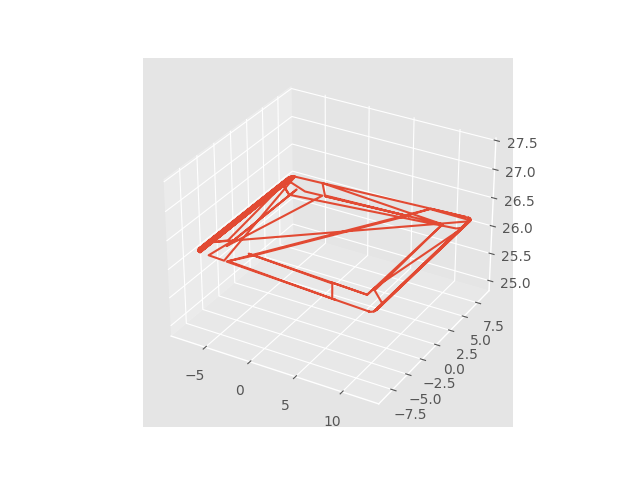

zp: 27.6510537800036


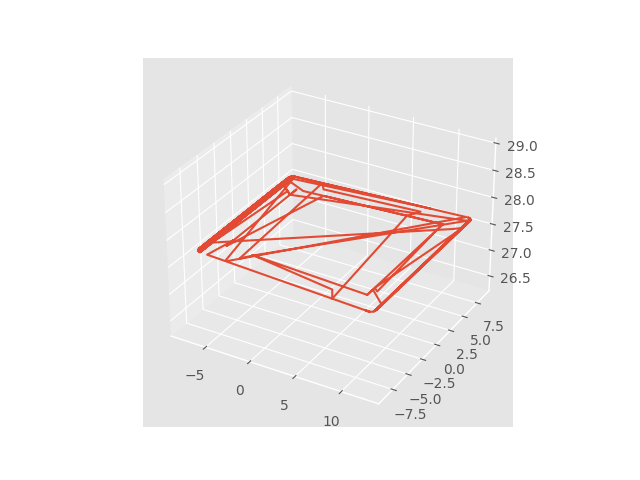

zp: 29.124211763080798


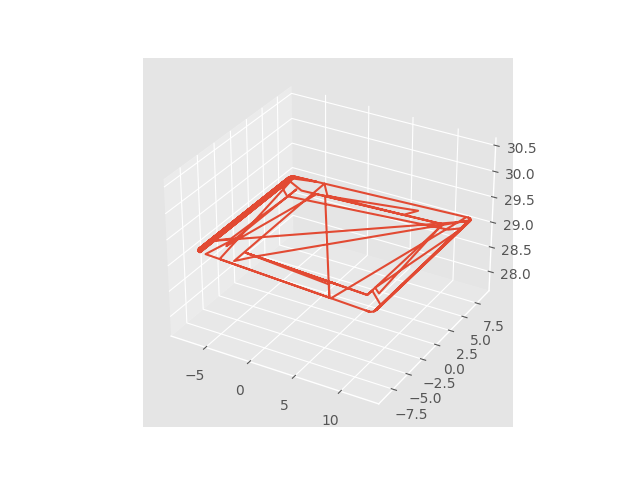

zp: 30.597369746157998


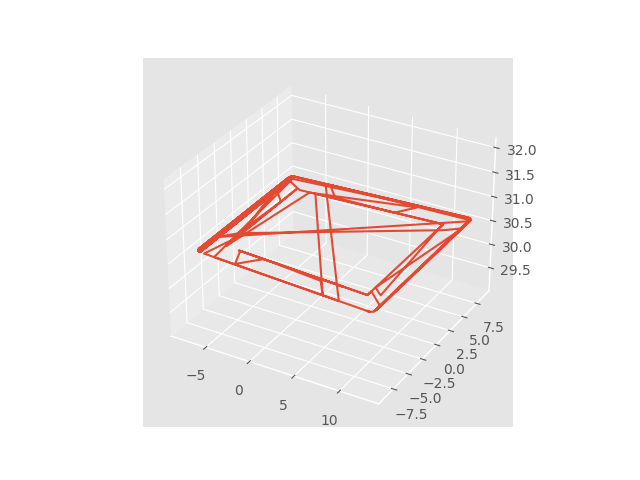

zp: 32.070527729235195


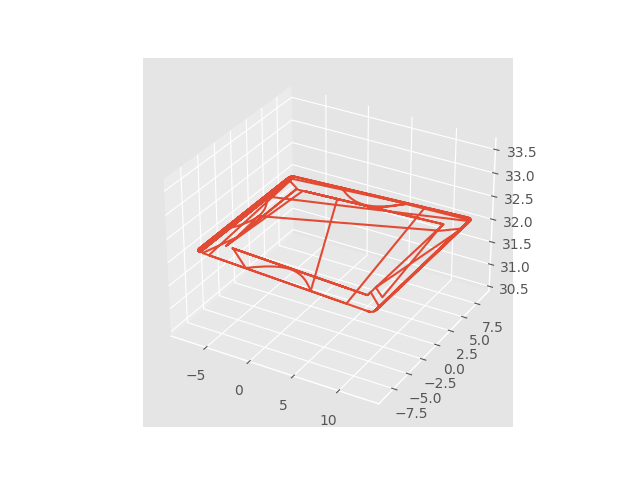

zp: 33.543685712312396


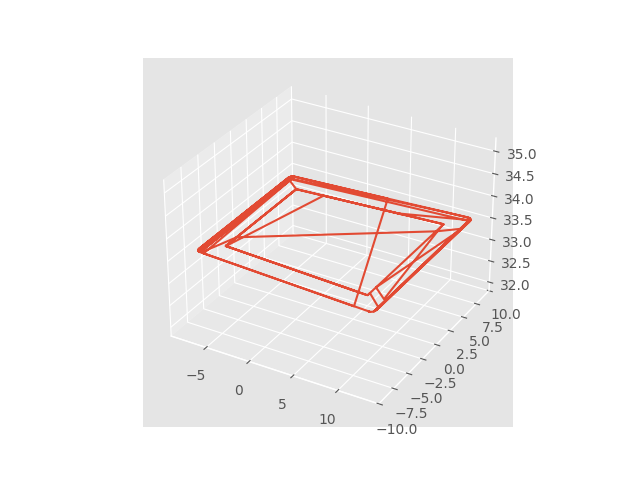

zp: 35.016843695389596


/var/folders/z1/r5wl186d23314ypyzy3t8wj80000gn/T/ipykernel_11507/3249713224.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  ax = plt.figure().add_subplot(projection='3d')


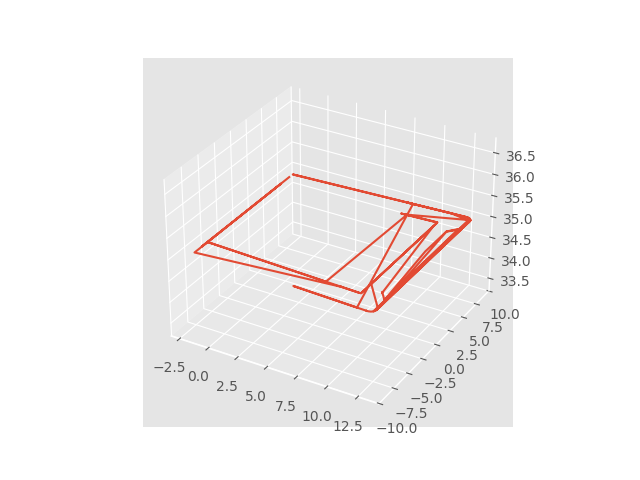

zp: 36.4900016784668


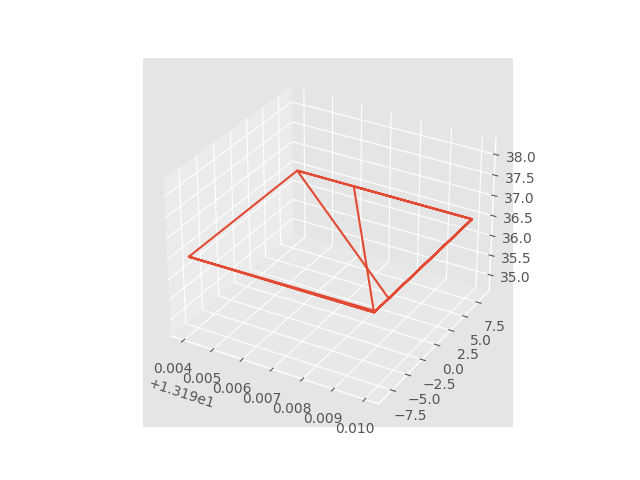

In [8]:
for zp in z_points:
    ax = plt.figure().add_subplot(projection='3d')
    xy_points = xy_dict[zp]
    print('zp:',zp)
    try:
        hull = ConvexHull(xy_points)
        points = hull.points
        hull_points = points[hull.vertices]
        hp = np.vstack((hull_points, hull_points[0]))
        # plt.plot(hp[:,0], hp[:,1], zp)
        plt.plot(xy_points[:,0], xy_points[:,1], zp)
        
        # plt.scatter(points[:,0], points[:,1], zp)
    except Exception:
        pass
    plt.show()